<a href="https://colab.research.google.com/github/Bint7bara/KerasEvaluateModule/blob/master/keras_binary_classifier_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nf = 21
seed = 7
# load pima indians dataset
# dataset = np.loadtxt("NewGencode4DLTraining2.csv", delimiter=",")
#dataset = np.loadtxt("12Featuresplus_LncAdeepScores.csv", delimiter=",")
dataset = np.loadtxt("20LncAdeepScores.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:nf] #12]
Y = dataset[:,nf] #12]

In [ ]:
(unique, counts) = np.unique(Y, return_counts=True)
print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0. 1.]
Counts of the target variable : [10079 14275]


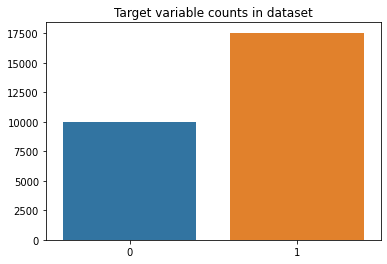

In [ ]:
sns.barplot(x=[0,1],y=[10010, 17561])
plt.title('Target variable counts in dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  3410
False Positive(FP) =  78
True Negative(TN)  =  2482
False Negative(FN) =  119
Accuracy of the binary classification = 0.968


In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 16,
    criterion = "entropy",
    min_samples_split = 5,
    max_features = 1./3

)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=nf))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2816      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
183/183 [==============================] - 1s 2ms/step - loss: 0.1617 - accuracy: 0.9418 - val_loss: 0.1150 - val_accuracy: 0.9673
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.1168 - val_accuracy: 0.9683
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9672 - val_loss: 0.1136 - val_accuracy: 0.9681
Epoch 4/100
183/183

[]

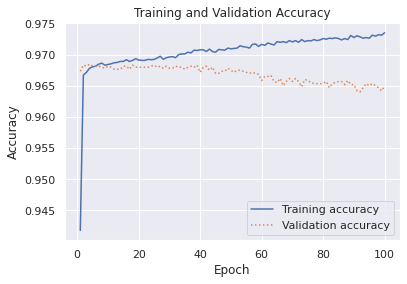

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))

191/191 [==============================] - 0s 867us/step
True Positive(TP)  =  3402
False Positive(FP) =  86
True Negative(TN)  =  2474
False Negative(FN) =  127
Accuracy of the binary classification = 0.965


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 
#model.add(Dense(128, activation='relu', input_dim=30))
model.add(Dense(nf, input_dim=nf, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 21)                462       
                                                                 
 dense_5 (Dense)             (None, 20)                440       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,233
Trainable params: 1,233
Non-traina

[]

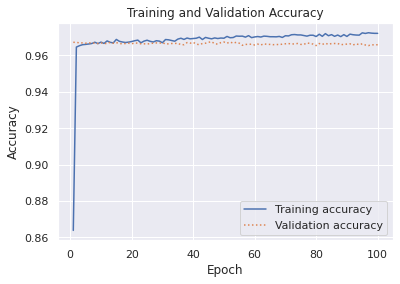

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))

191/191 [==============================] - 0s 870us/step
True Positive(TP)  =  3415
False Positive(FP) =  94
True Negative(TN)  =  2466
False Negative(FN) =  114
Accuracy of the binary classification = 0.966


191/191 [==============================] - 0s 790us/step


Text(89.18, 0.5, 'Actual label')

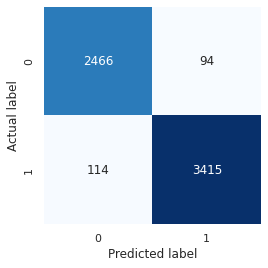

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.967647,0.966279,0.977638
Support Vector Machines,0.967482,0.964579,0.979005
Decision Trees,0.941370,0.954661,0.944756
Random Forest,0.966497,0.965713,0.976225
Naive Bayes,0.966990,0.964579,0.978161
K-Nearest Neighbor,0.965183,0.965713,0.973993


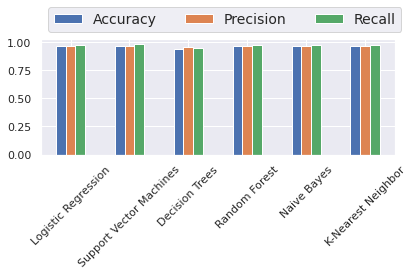

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()